<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/ML_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea 1. Aprendizaje máquina.**

Caso sencillo. Sean $\{(x_i,y_i)\}_{i=1}^{n}$ datos dados. Supongamos $m<<n$,  y $\{x_i\}_{i=1}^{m}\subset \{x_i\}_{i=1}^{n}$ una muestra aleatoria.

Definimos nuestra funcion de pérdida $$L(\alpha,\sigma)=||Y-\Phi_\sigma \cdot \alpha||^2_2$$

Donde $(\Phi_\sigma)_{i,j}=(\Phi_\sigma)_{i,j}(\sigma_j,x_j,x_i)$, para $i=1,2\ldots,n$, $j=1,2,\ldots,m$

Es decir, $\Phi_\sigma \cdot \alpha : \mathbb{R}^m\longrightarrow \mathbb{R}^n$.

Procederemos resolviendo 2 problemas de manera alternada.

**Problema 1**. Supongamos $\sigma$ conocida y constante. 
En tal caso, el problema $$argmin_{\alpha} L(\alpha)=||Y-\Phi_\sigma \cdot \alpha||^2_2$$
tiene solución trivial dada por $$\nabla_\alpha (L(\alpha))=0$$
$$\Phi_\sigma^t (Y-\Phi_\sigma\alpha)=0$$
$$\alpha=(\Phi_\sigma ^t\Phi_\sigma)^{-1}\Phi_\sigma^t Y$$

**Problema 2**. Supongamos $\alpha$ conocida y constante.
En tal caso, nos interesa resolver el problema $$argmin_{\sigma} L(\sigma)=||Y-\Phi_\sigma \cdot \alpha||^2_2$$
Aquí, para calcular el gradiente, primero notemos que 
$\Phi_\sigma\cdot \alpha =\Phi_\sigma(\sigma)\cdot \alpha$, es decir, es una función de $\sigma$. Si denotamos por $J_\sigma$ a la Jacobiana de esta función, tenemos 
$$\nabla_\sigma (L(\sigma))=(J_\sigma)^t (Y-\Phi_\sigma \cdot \alpha)$$

Obviamos las cuentitas, pero para resolver el problema, utilizaremos algún método de gradiente descendiente. Digamos, el de Nesterov.


De esta manera, podemos intercalar los problemas y obtener sucesiones $\alpha_k$, $\sigma_k$.

In [107]:
import numpy as np
import matplotlib.pyplot as plt

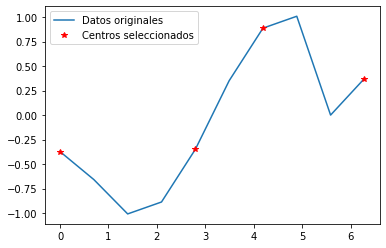

In [116]:
#GD Nesterov-----------------------------------
def GD_N(theta,alpha,eta,nIter, grad,stop_crit=10**(-4)):
    p     = np.zeros(theta.shape)
    Theta=[theta]
    for t in range(nIter):
        pre_theta = theta - 2.0*alpha*p
        g = grad(pre_theta)
        p = 0.5*(g + eta*p)
        if(np.linalg.norm(g)<stop_crit):
            break
        theta = theta - alpha*p
        Theta.append(theta)
    return Theta[-1]
#-----------------------------------
#Datos---------------------Los generamos por comodidad.
np.random.seed(0)
n=10
x=np.linspace(0,2*np.pi,n)
y=np.cos(x)+np.random.normal(0,0,size=len(x))
from numpy.random import default_rng
m=4
x_m2=[0]*m
x_m2[0]=0
x_m2[-1]=len(x)-1
x_m2[1:-1]=np.sort(default_rng().choice(np.arange(1, len(x)-1), size=m-2, replace=False))
x_m=x[x_m2]
#Diferencias finitas.-------------
y_p=np.zeros(n)
y_p[0]=(y[1]-y[0])
y_p[-1]=y[-1]-y[-2]
y_p[1:-2]=(y[2:-1]-y[0:-3])/2
y_p=y_p*n/(2*np.pi)
plt.plot(x,y_p,label='Datos originales')
plt.plot(x_m,y_p[x_m2],"r*",label='Centros seleccionados')
plt.legend()
plt.show()
#Le vamos a ajustar a los datos y_p.
#-----------------------------


In [123]:
#Matriz Phi_prima--------------------------------
def phi(s,x,x_j):#Funciones reales. phi_{i,j}(sin derivar)"
    return np.exp(-((x -x_j)**2)/(2*(s)**2))
def matriz_phi_sigma(sigma):
    M=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            M[i,j] = phi(s=sigma[j],x=x[i],x_j=x_m[j])*(-(x[i] -x_m[j])/(sigma[j]**2))#phi_prima
    return np.array(M)
def solve_for_alphas(M):#Resolver para alphas.
    return np.dot(np.dot(np.linalg.inv(np.dot(M.T,M)),M.T),y_p)
#---------------------------------

In [124]:
def J_sigma_phi(sigma,alpha):#Jacobiana de la transformacion Phi*alpha como funcion de sigma.
    J=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            J[i][j]=alpha[j]*(phi(s=sigma[j],x=x[i],x_j=x_m[j])*(((x[i]-x_m[j])**2)/sigma[j]**3)*(-(x[i]-x_m[j])/sigma[j]**2)+phi(s=sigma[j],x=x[i],x_j=x_m[j])*(2*(x[i]-x_m[j])/sigma[j]**3))
    return J
#-------------------------------------------

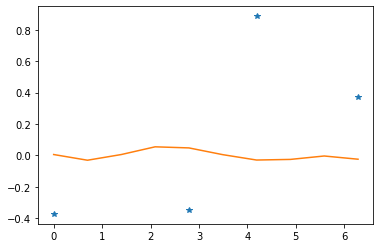

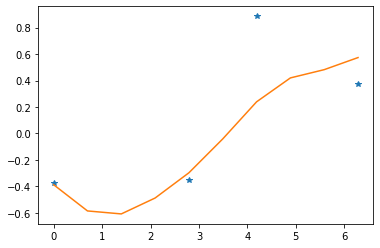

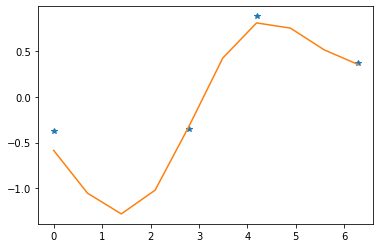

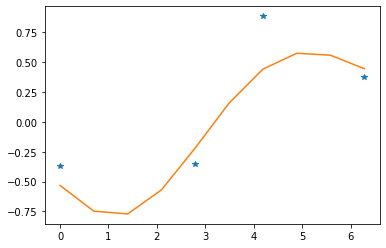

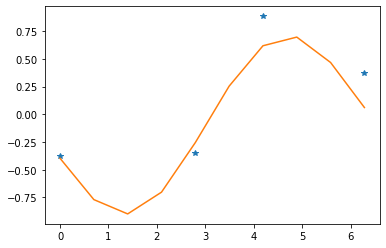

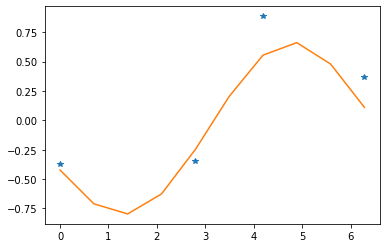

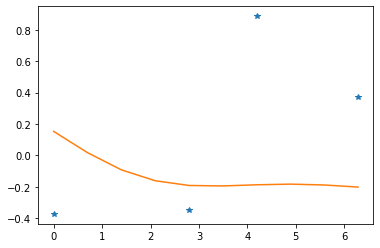

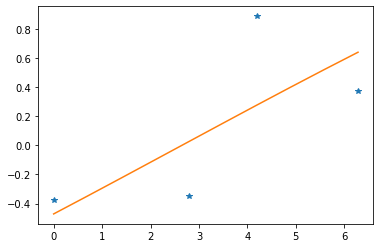

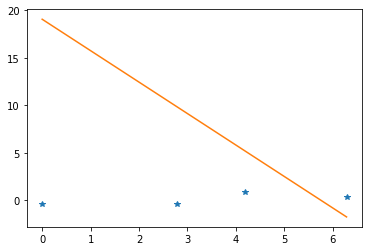

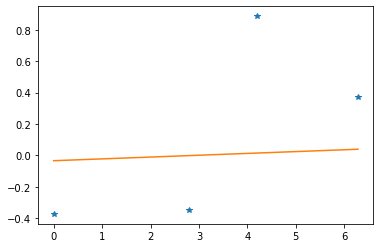

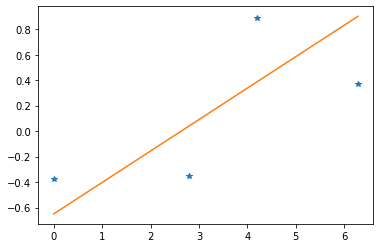

In [125]:
#Funcion de ajuste dado alpha, sigma, x. Con x real--------------------
def F_p_ajuste(sigma,alpha,z):
    sum=0
    for j in range(m):
        sum+=alpha[j]*phi(s=sigma[j],x=z,x_j=x_m[j])*(-(z -x_m[j])/(sigma[j]**2))
    return sum
def rutina(nIter,sigma_0,alpha_0,alpha,stop=10**(-3)):#Repetir los ajustes alternados.
    error=10
    def F_p_ajuste_a_s(W):#Vectorizacion
      R=[]
      for w in W:
          R.append(F_p_ajuste(sigma=sigma_0,alpha=alpha_0,z=w))
      return np.array(R)
    plt.plot(x_m,y_p[x_m2],'*',label='Centros seleccionados')
    plt.plot(x,F_p_ajuste_a_s(x),label='Ajuste')
    #plt.axis(ymin=min(y_p)-0.5,ymax=max(y_p)+0.5)
    plt.show()
    for r in range(nIter): 
        if(error<=stop):
            print("Criterio de paro")
            break;
        def grad_alpha(sigma):
            return np.dot(-J_sigma_phi(sigma=sigma,alpha=alpha_0).T,(y_p-np.dot(matriz_phi_sigma(sigma=sigma),alpha_0)))
        alpha_0=solve_for_alphas(matriz_phi_sigma(sigma_0))
        sigma_0=GD_N(theta=sigma_0,alpha=alpha,eta=0.9,nIter=nIter, grad=grad_alpha,stop_crit=10**(-6))# Llamar a Nesterov 15 veces
        
        error=np.linalg.norm(y_p-np.dot(matriz_phi_sigma(sigma=sigma_0),alpha_0))
        def F_p_ajuste_a_s(W):#Vectorizacion
            R=[]
            for w in W:
                R.append(F_p_ajuste(sigma=sigma_0,alpha=alpha_0,z=w))
            return np.array(R)
        plt.plot(x_m,y_p[x_m2],'*',label='Centros seleccionados')
        plt.plot(x,F_p_ajuste_a_s(x),label='Ajuste')
        #plt.axis(ymin=min(y_p)-0.5,ymax=max(y_p)+0.5)
        plt.show()
    
    #plt.plot(x,y_p)
    
    return alpha_0,sigma_0
#----------------------------------------
#Condiciones iniciales------------
np.random.seed(0)
sigma_0=np.random.normal(1,0,size=m)#A ojo
alpha_0=np.repeat(.1,m)#Suma de derivadas de Gaussianas
#-------------------------
for alpha in [10**(0)]:#Tamaño de paso variable y muy pequeño
    alpha_0,sigma_0=rutina(nIter=10,sigma_0=sigma_0,alpha_0=alpha_0,alpha=alpha)

In [112]:
print(alpha_0)
print(sigma_0)

[1.75734444 1.19157472]
[1. 1.]


En este ejercicio. Estamos asumiendo que los datos proporcionados son las diferencias finitas de algunos datos desconocidos. De esta manera, integrando las funciones $\phi_{i,j}$ podemos obtener un ajuste para los datos originales.

**Nota.** Hacen falta condiciones iniciales, pues al integrar, obtenemos una constante de integración.

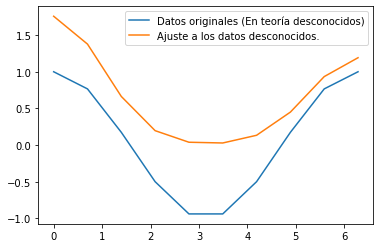

In [113]:
def F_ajuste_original(sigma,alpha,z):#Funcion de ajuste dado alpha, sigma, x. Con x real
    sum=0
    for j in range(m):
        sum+=alpha[j]*np.exp(-(1/(2*sigma[j]**2))*(z-x_m[j])**2)
    return sum
def F_ajuste_a_s_original(W):
       R=[]
       for w in W:
           R.append(F_ajuste_original(sigma=sigma_0,alpha=alpha_0,z=w))
       return np.array(R)
plt.plot(x,y,label='Datos originales (En teoría desconocidos)')
plt.plot(x,F_ajuste_a_s_original(x),label='Ajuste a los datos desconocidos.')
#plt.axis(ymin=min(y)-1,ymax=max(y)+1)
plt.legend()
plt.show()

In [114]:
print(F_ajuste_original(sigma=sigma_0,alpha=alpha_0,z=0)+F_p_ajuste(sigma=sigma_0,alpha=alpha_0,z=0))

181.0298316772238
